In [4]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
zipfile_name = r'C:\Users\Mehmet Ali Devran\Downloads\archive (3).zip' ## Unzip the file
with zipfile.ZipFile(zipfile_name, 'r') as file:  ## Extract the file
    file.extractall()


In [27]:
df_a = pd.read_csv('world_population_data.csv')
df_a['growth rate'] = df_a['growth rate'].str.strip('%').astype(float)
df_a['world percentage'] = df_a['world percentage'].str.strip('%').astype(float)
new_cols = {'cca3' : 'country_code', 'area (km²)' : 'area', 'density (km²)' : 'density', 'growth rate' : 'growth_rate', 'world percentage' : 'world_percentage'}
df_a.rename(new_cols, axis = 1, inplace = True)
df_a['population_difference'] = df_a['2023 population'] - df_a['1970 population']
df_a

,rank,country_code,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area,density,growth_rate,world_percentage,population_difference
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.00,481,0.81,17.85,871126362
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.00,151,-0.02,17.81,603136902
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.00,37,0.50,4.25,139668223
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.00,148,0.74,3.47,162305728
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.00,312,1.98,3.00,181194786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,MSR,Montserrat,North America,4386,4390,4500,5059,4938,5138,10805,11452,11402,102.00,43,-0.09,0.00,-7016
230,231,FLK,Falkland Islands,South America,3791,3780,3747,3408,3187,3080,2332,2240,2274,12173.00,0,0.29,0.00,1517
231,232,NIU,Niue,Oceania,1935,1934,1942,1847,1812,2074,2533,3637,5185,261.00,7,0.05,0.00,-3250
232,233,TKL,Tokelau,Oceania,1893,1871,1827,1454,1367,1666,1669,1647,1714,12.00,189,1.18,0.00,179


                            OLS Regression Results                            
Dep. Variable:        2023 population   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     59.78
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           3.21e-13
Time:                        17:19:46   Log-Likelihood:                -4689.5
No. Observations:                 234   AIC:                             9383.
Df Residuals:                     232   BIC:                             9390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.385e+07   8.45e+06      1.639      0.1

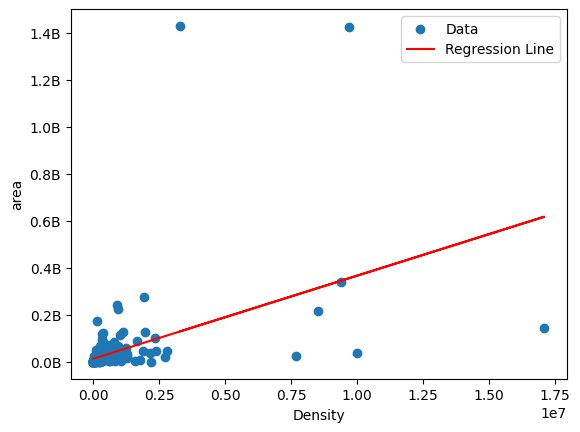

In [46]:
from matplotlib.ticker import FuncFormatter
data = df_a[['2023 population', 'area']]

# Drop rows with missing values
data = data.dropna()

# Add a constant term for the intercept
X = sm.add_constant(data['area'])
y = data['2023 population']

# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Display regression summary
print(results.summary())
def billions_formatter(x, pos):
    return f'{x / 1e9:.1f}B'
formatter = FuncFormatter(billions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Create a custom formatter for the y-axis ticks
formatter = FuncFormatter(billions_formatter)

# Plot the data and regression line

plt.scatter(data['area'], y, label='Data')
plt.plot(data['area'], results.predict(X), color='red', label='Regression Line')
plt.xlabel('Density')
plt.ylabel('area')
plt.legend()
plt.show()